In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

target_dict = {
        "emo": [
            "Awe",
            "Excitement",
            "Amusement",
            "Awkwardness",
            "Fear",
            "Horror",
            "Distress",
            "Triumph",
            "Sadness",
            "Surprise"
        ],

        "aro_val": [
            "Arousal",
            "Valence"
        ]
    }

emo_targets = target_dict["emo"]
aro_val_targets = target_dict["aro_val"]
fontsize = 16

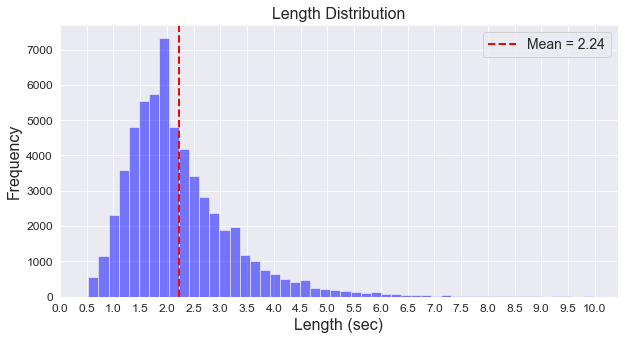

In [36]:
lengthdf = pd.read_csv('data_length_size.csv')

plt.figure(figsize=(10,5))
x = lengthdf['Length']

plt.rcParams['font.size'] = '12'
plt.hist(x, bins=50, color='blue', alpha=0.5)
plt.xticks(np.arange(0, max(x) + .5, step=.5))
plt.xlabel('Length (sec)', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)
r = plt.title('Length Distribution', fontsize=fontsize)
plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=2)
plt.legend(['Mean = ' + str(round(x.mean(), 2))], fontsize=fontsize-2)
plt.savefig('results/img/length_distribution.png')

plt.show()

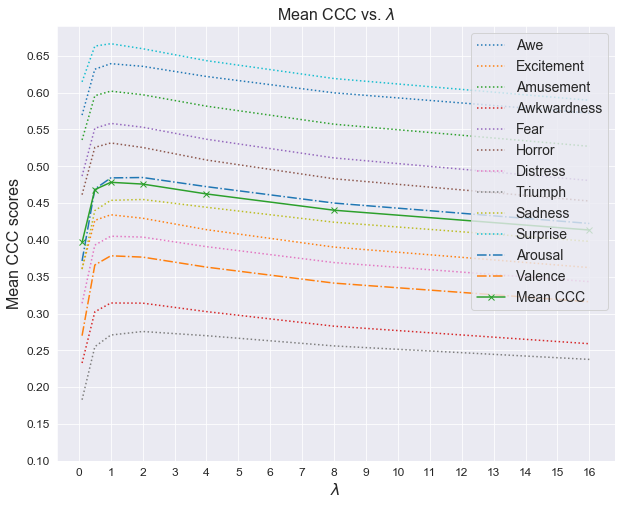

In [61]:
funcs_and_fv_df = pd.read_csv('results/exp_batch07_compare_llds_110pca_200gmm_fv_plus_compare_funcs/all_scores_both.csv')
aro_val_targets = target_dict['aro_val']
emo_targets = target_dict['emo']
x = funcs_and_fv_df['c']
plt.figure(figsize=(10,8))
for target in emo_targets:
    plt.plot(x, funcs_and_fv_df[target+'_ccc'], label=target, linestyle=':')
for target in aro_val_targets:
    plt.plot(x, funcs_and_fv_df[target+'_ccc'], label=target, linestyle='-.')
plt.plot(x, funcs_and_fv_df['mean_ccc'], label='Mean CCC', linestyle='solid', marker='x')
plt.xticks(np.arange(0, max(x) + 1, step=1))
plt.yticks(np.arange(0.1, 0.7, step=0.05))
plt.xlabel(r'$\lambda$', fontsize=fontsize)
plt.ylabel('Mean CCC scores', fontsize=fontsize)
plt.legend(fontsize=fontsize-2, loc='upper right')
plt.title(r'Mean CCC vs. $\lambda$', fontsize=fontsize)
plt.savefig('results/img/mean_ccc_vs_lambda.png')
plt.show()


In [79]:
df = funcs_and_fv_df.drop(['kernel', 'power'], axis=1)

df_ccc = df.drop(list(df.filter(regex = '_r')) + ['mean_ccc'] + list(df.filter(regex= 'Arousal|Valence')), axis = 1)
ccc_table = df_ccc.to_latex(index=False, float_format=lambda x: '{:.3f}'.format(x))
df_r = df.drop(list(df.filter(regex = '_ccc')) + list(df.filter(regex= 'Arousal|Valence')), axis = 1)
r_table = df_r.to_latex(index=False, float_format=lambda x: '{:.3f}'.format(x))
print(ccc_table)
print(r_table)

\begin{tabular}{rrrrrrrrrrr}
\toprule
     c &  Awe\_ccc &  Excitement\_ccc &  Amusement\_ccc &  Awkwardness\_ccc &  Fear\_ccc &  Horror\_ccc &  Distress\_ccc &  Triumph\_ccc &  Sadness\_ccc &  Surprise\_ccc \\
\midrule
 0.100 &    0.570 &           0.361 &          0.536 &            0.233 &     0.487 &       0.461 &         0.314 &        0.183 &        0.360 &         0.615 \\
 0.500 &    0.632 &           0.426 &          0.596 &            0.302 &     0.552 &       0.526 &         0.393 &        0.255 &        0.440 &         0.663 \\
 1.000 &    0.639 &           0.434 &          0.602 &            0.314 &     0.558 &       0.532 &         0.405 &        0.271 &        0.454 &         0.666 \\
 2.000 &    0.636 &           0.429 &          0.597 &            0.314 &     0.553 &       0.525 &         0.404 &        0.276 &        0.455 &         0.660 \\
 4.000 &    0.622 &           0.414 &          0.582 &            0.303 &     0.537 &       0.508 &         0.391 &        0.270

In [4]:
#write a function that takes a dataframe and returns a latex table
df_dict = {}
for result_folder in os.listdir(r"results"):
    if result_folder == 'img':
        continue
    emo_scores = pd.read_csv(r"results/" + result_folder + "/all_scores_emo.csv")
    aro_val_scores = pd.read_csv(r"results/" + result_folder + "/all_scores_aro_val.csv")
    emo_scores = emo_scores.drop(['kernel', 'power'], axis=1)
    aro_val_scores = aro_val_scores.drop(['kernel', 'power'], axis=1)
    df_dict[result_folder] = {'emo': emo_scores, 'aro_val': aro_val_scores}

In [6]:
print(df_dict['exp_batch07_compare_llds_110pca_200gmm_fv_plus_compare_funcs']['emo'])

      c  mean_ccc  Awe_ccc  Excitement_ccc  Amusement_ccc  Awkwardness_ccc  \
0   0.1    0.4118   0.5695          0.3608         0.5357           0.2328   
1   0.5    0.4784   0.6318          0.4265         0.5958           0.3023   
2   1.0    0.4875   0.6393          0.4341         0.6020           0.3143   
3   2.0    0.4849   0.6357          0.4294         0.5971           0.3141   
4   4.0    0.4714   0.6219          0.4139         0.5816           0.3026   
5   8.0    0.4492   0.5997          0.3902         0.5571           0.2828   
6  16.0    0.4223   0.5722          0.3624         0.5271           0.2590   

   Fear_ccc  Horror_ccc  Distress_ccc  Triumph_ccc  ...     Awe_r  \
0    0.4867      0.4614        0.3139       0.1829  ...  0.664989   
1    0.5516      0.5257        0.3929       0.2549  ...  0.685607   
2    0.5582      0.5316        0.4050       0.2708  ...  0.679481   
3    0.5530      0.5255        0.4038       0.2756  ...  0.663711   
4    0.5367      0.5085       

In [26]:
df = pd.read_csv(r'results/emo_fusion_full_alpha.csv', delimiter=';')
df = df.transpose()
df.columns = [df.iloc[0], df.iloc[1]]
df = df[2:]
df = df.transpose()
print(df.info())
print(df.index)
df.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14 entries, ('emo', 'IS13 Functionals') to ('aroval', 'IS13 FV (PCA=130, GMM=200) + Functionals')
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14 non-null     object
 1   0.1     14 non-null     object
 2   0.2     14 non-null     object
 3   0.3     14 non-null     object
 4   0.4     14 non-null     object
 5   0.5     14 non-null     object
 6   0.6     14 non-null     object
 7   0.7     14 non-null     object
 8   0.8     14 non-null     object
 9   0.9     14 non-null     object
 10  1       14 non-null     object
dtypes: object(11)
memory usage: 1.8+ KB
None
MultiIndex([(   'emo',                         'IS13 Functionals'),
            (   'emo',               'IS13 FV (PCA=110, GMM=200)'),
            (   'emo', 'IS13 FV (PCA=110, GMM=200) + Functionals'),
            (   'emo',              'IS13 FV (PCA=130, GMM=128) '),
            (   'emo', 'IS13 FV (

0     0.1     0.2  \
Unnamed: 0 alpha                                                              
emo        IS13 Functionals                           0.452  0.4599  0.4674   
           IS13 FV (PCA=110, GMM=200)                 0.437  0.4377  0.4383   
           IS13 FV (PCA=110, GMM=200) + Functionals  0.4875  0.4886  0.4896   
           IS13 FV (PCA=130, GMM=128)                0.4371  0.4379  0.4387   
           IS13 FV (PCA=130, GMM=128) + Functionals  0.4864  0.4877  0.4889   

                                                        0.3     0.4     0.5  \
Unnamed: 0 alpha                                                              
emo        IS13 Functionals                          0.4742  0.4804  0.4861   
           IS13 FV (PCA=110, GMM=200)                0.4389  0.4395    0.44   
           IS13 FV (PCA=110, GMM=200) + Functionals  0.4906  0.4914  0.4922   
           IS13 FV (PCA=130, GMM=128)                0.4394    0.44  0.4406   
           IS13 FV (PCA=130, GMM=128) + Functionals  0.4901  0.4912  0.4923   

                                                        0.6     0.7     0.8  \
Unnamed: 0 alpha                                                              
emo        IS13 Functionals                          0.4911  0.4954  0.4991   
           IS13 FV (PCA=110, GMM=200)                0.4404  0.4408  0.4411   
           IS13 FV (PCA=110, GMM=200) + Functionals   0.493  0.4937  0.4944   
           IS13 FV (PCA=130, GMM=128)                0.4411  0.4415  0.4419   
           IS13 FV (PCA=130, GMM=128) + Functionals  0.4932  0.4941   0.495   

                                                        0.9       1  
Unnamed: 0 alpha                                                     
emo        IS13 Functionals                          0.5021  0.5044  
           IS13 FV (PCA=110, GMM=200)                0.4414  0.4416  
           IS13 FV (PCA=110, GMM=200) + Functionals  0.4949  0.4955  
           IS13 FV (PCA=130, GMM=128)                0.4422  0.4424  
           IS13 FV (PCA=130, GMM=128) + Functionals  0.4957  0.4964

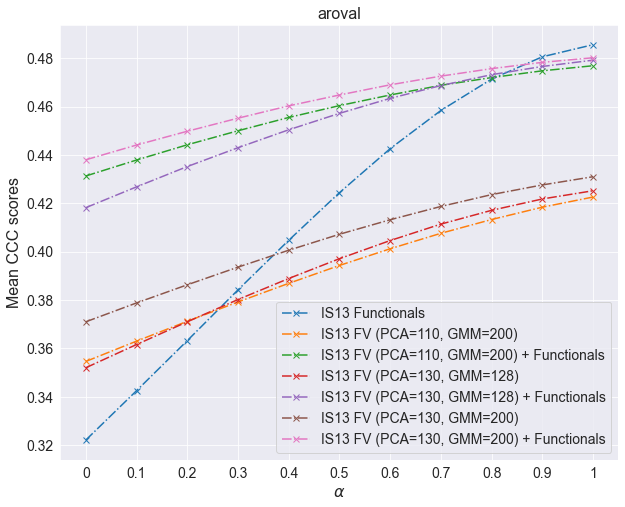

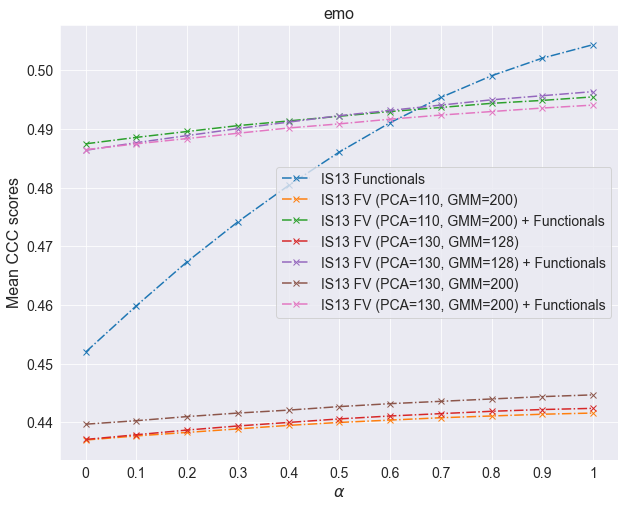

In [50]:
plt.rcParams['font.size'] = '14'
for type, new_df in df.groupby(level = 0):
    plt.figure(figsize=(10,8))
    for feature, row in new_df.iterrows():
        plt.plot(new_df.columns, row, label=feature[1], linestyle='-.', marker='x')
    plt.xlabel(r'$\alpha$', fontsize=fontsize)
    plt.ylabel('Mean CCC scores', fontsize=fontsize)
    plt.legend(fontsize=fontsize-2)
    plt.title(type, fontsize=fontsize)
    plt.show()

In [52]:
df = pd.read_csv(r'results/functional_comparison_full.csv', delimiter=';')
df = df.transpose()
df.columns = [df.iloc[0], df.iloc[1]]
df = df[2:]
df = df.transpose()
print(df.info())
print(df.index)
df.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, ('emo', 'IS13 FV (PCA=110, GMM=200)') to ('aroval', 'IS13 FV (PCA=130, GMM=200) + Functionals')
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0.0     12 non-null     object
 1   0.1     12 non-null     object
 2   0.2     12 non-null     object
 3   0.3     12 non-null     object
 4   0.4     12 non-null     object
 5   0.5     12 non-null     object
 6   0.6     12 non-null     object
 7   0.7     12 non-null     object
 8   0.8     12 non-null     object
 9   0.9     12 non-null     object
 10  1.0     12 non-null     object
dtypes: object(11)
memory usage: 1.5+ KB
None
MultiIndex([(   'emo',               'IS13 FV (PCA=110, GMM=200)'),
            (   'emo', 'IS13 FV (PCA=110, GMM=200) + Functionals'),
            (   'emo',              'IS13 FV (PCA=130, GMM=128) '),
            (   'emo', 'IS13 FV (PCA=130, GMM=128) + Functionals'),
            (   'emo', 

0.0     0.1     0.2  \
Unnamed: 0 alpha                                                              
emo        IS13 FV (PCA=110, GMM=200)                0.4416  0.4558  0.4686   
           IS13 FV (PCA=110, GMM=200) + Functionals  0.4955  0.5009  0.5054   
           IS13 FV (PCA=130, GMM=128)                0.4424  0.4565  0.4692   
           IS13 FV (PCA=130, GMM=128) + Functionals  0.4964  0.5016  0.5058   
           IS13 FV (PCA=130, GMM=200)                0.4447  0.4584  0.4707   

                                                        0.3     0.4     0.5  \
Unnamed: 0 alpha                                                              
emo        IS13 FV (PCA=110, GMM=200)                0.4798  0.4893  0.4968   
           IS13 FV (PCA=110, GMM=200) + Functionals  0.5089  0.5113  0.5128   
           IS13 FV (PCA=130, GMM=128)                0.4803  0.4897  0.4971   
           IS13 FV (PCA=130, GMM=128) + Functionals  0.5091  0.5115  0.5128   
           IS13 FV (PCA=130, GMM=200)                0.4815  0.4905  0.4976   

                                                        0.6     0.7     0.8  \
Unnamed: 0 alpha                                                              
emo        IS13 FV (PCA=110, GMM=200)                0.5024  0.5059  0.5074   
           IS13 FV (PCA=110, GMM=200) + Functionals  0.5132  0.5125  0.5108   
           IS13 FV (PCA=130, GMM=128)                0.5026   0.506  0.5074   
           IS13 FV (PCA=130, GMM=128) + Functionals  0.5131  0.5124  0.5107   
           IS13 FV (PCA=130, GMM=200)                0.5028  0.5061  0.5074   

                                                        0.9     1.0  
Unnamed: 0 alpha                                                     
emo        IS13 FV (PCA=110, GMM=200)                0.5068  0.5044  
           IS13 FV (PCA=110, GMM=200) + Functionals  0.5081  0.5044  
           IS13 FV (PCA=130, GMM=128)                0.5068  0.5044  
           IS13 FV (PCA=130, GMM=128) + Functionals   0.508  0.5044  
           IS13 FV (PCA=130, GMM=200)                0.5068  0.5044